In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

label 확인

- 총 10개의 범주가 있다.

- 0 : T-shirt
- 1 : Pants
- 2 : 
- 3 : 
- 4 : 
- 5 : 
- 6 : 
- 7 : 
- 9 : 
- 8 : 


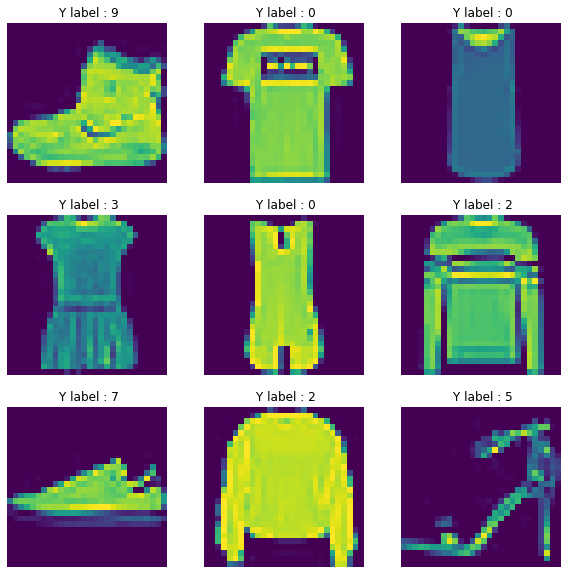

In [3]:
plt.figure(figsize=(10,10))

# 한 화면에 9개를 동시에 출력할 것이므로 for문을 이용

for i in range(9):
    # subplot
    plt.subplot(3,3, i+1)
    # 제목
    plt.title(' Y label : {}'.format(train_Y[i]))
    # 크기를 알려주는 지표가 있긴 한데 딱히 볼필요 없으므로 off
    plt.axis('off')
    # 이미지 출력
    plt.imshow(train_X[i])

plt.show()

이미지 데이터이므로 차원 값은 2다.

**중요** : 이미지를 다루려면 차원에 대한 개념이 필요하다.

한 장의 이미지의 shape를 봐야 한다. 

In [4]:
print("train_X[0].shape : ", train_X[0].shape)
print("train_X[0].ndim : ", train_X[0].ndim)

train_X[0].shape :  (28, 28)
train_X[0].ndim :  2


In [5]:
# 한 장도 중요한데 미니배치를 기준으로 학습시키기 때문에! (미니배치사이즈를 학습 데이터 전체라고 본다.)
# 차원이 하나 추가되게 된다.
print("train_X.shape : ", train_X.shape)
print("train_X.ndim : ", train_X.ndim)

# 미니배치를 고려한 흑백 이미지의 차원은 3차원

train_X.shape :  (60000, 28, 28)
train_X.ndim :  3


In [6]:
# 색이 있을 때 (컬러이미지) 차원은 하나 더 추가된다.
# 채널값이라고 한다.

# 색을 r, g, b로 나누는데 이 값을 채널값이라고 한다.
# 데이터가 복잡해질수록 차원이 커지기 때문에 텐서 연산을 효과적으로 해야한다.ㅠ

그렇다면 영상은? : 이미지가 여러개 붙어있는 데이터이므로 차원수가 이미지에서 하나 더 추가한다.

> 차원수가 복잡해진다 = 연산이 복잡해진다 = 순전파, 역전파에 의해 영향을 많이 받는다.

### 이미지 정규화?

이미지도 숫자이므로 정규화 할 수 있다.

**어떻게?**

- RGB를 생각했을 때 가장 큰 값은 255다.
- 0 ~ 255 이므로 이상치가 발생하지 않는다. $\therefore$ MinMax 사용 가능

In [7]:
print(np.min(train_X))
print(np.max(train_X))

0
255


In [8]:
train_X_norm = train_X / 255.0
print(np.min(train_X_norm))
print(np.max(train_X_norm))

0.0
1.0


In [9]:
# 이제 테스트 데이터도 확인하자.
test_X_norm = test_X / 255.0

In [11]:
Fmnist_relu_DNN = tf.keras.Sequential([
                                        tf.keras.layers.Flatten(input_shape = (28,28)),
                                        tf.keras.layers.Dense(units= 128, activation = "relu"),
                                        tf.keras.layers.Dense(units= 64, activation = "relu"),
                                        tf.keras.layers.Dense(units= 32, activation = "relu"),
                                        tf.keras.layers.Dense(units= 10, activation = "softmax")     # unit값 : 종속변수의 개수만큼, 마지막은 softmax
])

# one hot vector 방식이 아닐 때에는 다른 손실함수를 부러와야 한다.
# compile하자.

In [12]:
Fmnist_relu_DNN.compile(optimizer=tf.keras.optimizers.Adam(),
                        loss = 'sparse_categorical_crossentropy',       # sparse? : 단순 one hot vector가 아닐 때 사용할 수 있다.
                        metrics = ['accuracy'])

In [13]:
# 이미지를 다루는 모델이고, 파라미터가 굉장히 많다.(summary로 확인 가능 : 11만개, 계층 많이 쌓은것도 아닌데 이렇다.)
# flatten은 일차원으로 펼치는 과정이고 그 값을 128개와 모두 연결시키다보니 파라미터가 많이 생겼다.

Fmnist_relu_DNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [14]:
# fit

# epoch 값이 적으므로 call back은 넘어간다.

history = Fmnist_relu_DNN.fit(train_X_norm, train_Y, epochs = 25, validation_split = 0.2, batch_size = 32)

Epoch 1/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5308 - accuracy: 0.8101 - val_loss: 0.4302 - val_accuracy: 0.8467
Epoch 2/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3830 - accuracy: 0.8606 - val_loss: 0.4226 - val_accuracy: 0.8496
Epoch 3/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3459 - accuracy: 0.8746 - val_loss: 0.3673 - val_accuracy: 0.8707
Epoch 4/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3209 - accuracy: 0.8822 - val_loss: 0.3885 - val_accuracy: 0.8563
Epoch 5/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3022 - accuracy: 0.8870 - val_loss: 0.3768 - val_accuracy: 0.8670
Epoch 6/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2910 - accuracy: 0.8912 - val_loss: 0.3296 - val_accuracy: 0.8827
Epoch 7/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2773 - accuracy: 0.8964 - val_loss: 0.3861 - val_accuracy:

보통 한 번 학습할 때 1초정도 걸리는데 이번 학습과정은 한번에 4초씩 걸린다. => 파라미터가 많기 때문

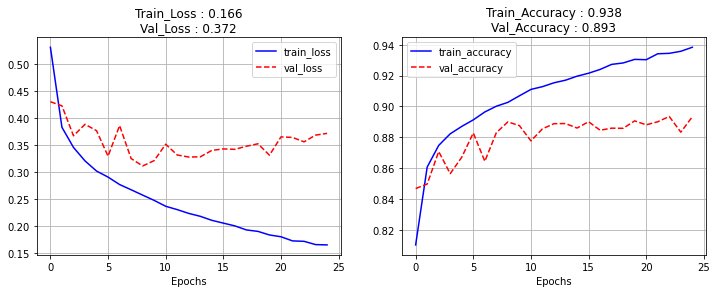

In [15]:
# 예측된 값을 밖으로 꺼내보자. : 시각화
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

val_loss = history.history['val_loss']
loss     = history.history['loss']

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)

plt.plot(history.history['loss'], 'b-', label = 'train_loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')

plt.xlabel('Epochs')
plt.title('Train_Loss : {:.3f}\nVal_Loss : {:.3f}'.\
          format(loss[-1], val_loss[-1]))

plt.legend()
plt.grid()

plt.subplot(1,2,2)

plt.plot(history.history['accuracy'], 'b-', label = 'train_accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label = 'val_accuracy')

plt.xlabel('Epochs')
plt.title('Train_Accuracy : {:.3f}\nVal_Accuracy : {:.3f}'.\
          format(accuracy[-1], val_accuracy[-1]))

plt.legend()
plt.grid()

plt.show()

학습데이터 값은 잘 올라가는데 검증데이터는 거기서 거기다. : 전형적인 overfitting

- 과적합이 뜰 때? (참고)
    - 드롭아웃 : 노드를 무작위로 탈락
    - 배치정규화 : 배치마다 정규화를 걸어준다. (생각보다 성능 괜찮다.)

In [17]:
pred_Y = Fmnist_relu_DNN.predict(test_X[[47]])
pred_Y = np.round(pred_Y, 3)
print(pred_Y)

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


소수점 세자리까지 올렸는데도 0, 1, 0 ... 정수로 표현되는걸 보면 학습이 무척 잘 되었단걸 알 수 있다. (오버피팅이 문제지)

In [ ]:
# 시각화

plt.imshow(test_X[65])
plt.show()

# 예측값과 실제값이 똑같은지 아닌지 확인 : np.argmax
pred_Y_argmax = np.argmax(pred_Y)   # 예측한 '확률'값에서 가장 큰 값의 index 추출
correct = np.equal(pred_Y_argmax, test_Y[65])  # 실제값(np.equal())과 비교
